In [1]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv

Эксперимент 1: Сравнение изображений из изначальной выборки, P1-P3 - образнцы снимков камеры, Pxxx - снимок, принадлежность которого под вопросом

In [2]:
im1 = 'Images'+os.sep+'P1.jpg'
im2 = 'Images'+os.sep+'P2.jpg'
im3 = 'Images'+os.sep+'P3.jpg'
Images = [im1, im2, im3]

In [3]:
RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

In [4]:
imx = 'Images'+os.sep+'Pxxx.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))

In [5]:
Ix = cv.cvtColor(cv.imread(imx), cv.COLOR_BGR2GRAY)

PCE: 201.9313890273873
pvalue: 3.956757695302438e-46
PeakLocation: [0, 0]
peakheight: 0.016602956911497678
P_FA: 3.956757695302438e-46
log10P_FA: -45.402660544329656


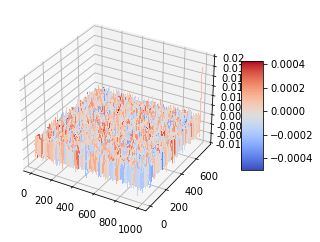

In [6]:
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Тот же тест, но изображения P2 и Pxxx поменялись местами:

In [7]:
im1 = 'Images'+os.sep+'P1.jpg'
im2 = 'Images'+os.sep+'Pxxx.jpg'
im3 = 'Images'+os.sep+'P3.jpg'
Images = [im1, im2, im3]

In [8]:
RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

PCE: 228.26111429863465
pvalue: 7.137410785991598e-52
PeakLocation: [0, 0]
peakheight: 0.017525628339177715
P_FA: 7.137410785991598e-52
log10P_FA: -51.146459307172535


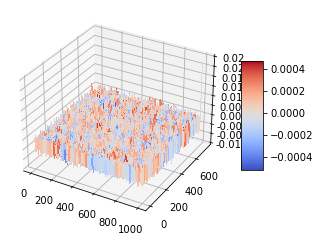

In [10]:
imx = 'Images'+os.sep+'P2.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
Ix = cv.cvtColor(cv.imread(imx), cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Заключение: принадлежность снимка Pxxx к данной камере можно считать установленой, а значение коэффициента подобия (PCE) = 200  - достаточным для установления пренадлежности снимка к камере.

Эксперимент 1.1: Сравнение отпечатка камеры с отпечатком случайного изображения, взятого из интернета

PCE: 0.022721930530852044
pvalue: 0.4400912164881009
PeakLocation: [0, 0]
peakheight: 0.00016983306892036457
P_FA: 0.4400912164881009
log10P_FA: -0.3564572991689708


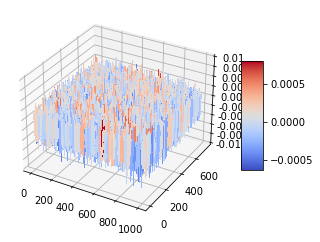

In [22]:
imx = 'Images'+os.sep+'Pyyy.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Заключение: коэффициент подобия меньше единицы можно считать достаточным для установления непринадлежности снимка к камере

Эксперимент 1.2: Сравнение отпечатка камеры с изображением из изначальной выборки, отражённым по горизонтали

PCE: 7.704183564355594e-05
pvalue: 0.4964983897863842
PeakLocation: [0, 0]
peakheight: 1.0324992966405924e-05
P_FA: 0.49649838978638416
log10P_FA: -0.3040821556439717


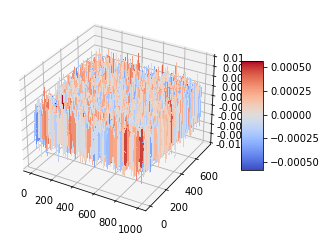

In [23]:
imx = 'Images'+os.sep+'Pzzz.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Заключение: отпечаток камеры асимментричен

Эксперимент 1.3: Сравнение отпечатка камеры и одним из изображений из изначальной выборки

PCE: 177385.0327975482
pvalue: 0.0
PeakLocation: [0, 0]
peakheight: 0.49670225793797057
P_FA: 0.0
log10P_FA: -38521.69400652174


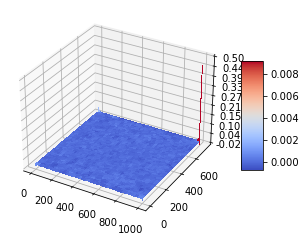

In [24]:
imx = 'Images'+os.sep+'P2.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Эксперимент 2: Эксперименты из раздела 1, проводимые на тех же изображениях, сжатых до размера 256х256

In [10]:
# extracting Fingerprint from same size images in a path
im1 = 'Images'+os.sep+'RP1.jpg'
im2 = 'Images'+os.sep+'RP2.jpg'
im3 = 'Images'+os.sep+'RP3.jpg'
Images = [im1, 
          im2, 
          im3]

In [11]:
RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

# To save RP in a '.mat' file:
#import scipy.io as sio
#sio.savemat('Fingerprint.mat', {'RP': RP, 'sigmaRP': sigmaRP, 'Fingerprint': Fingerprint})

PCE: 2.473822965355244
pvalue: 0.0578780349106208
PeakLocation: [0, 0]
peakheight: 0.006448015109802637
P_FA: 0.057878034910620824
log10P_FA: -1.2374862225765237


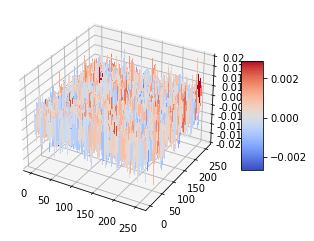

In [12]:
imx = 'Images'+os.sep+'RPxxx.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Эксперимент 2.1: случайное изображение из интернета

PCE: -0.2680187086773521
pvalue: 0.697668026845066
PeakLocation: [0, 0]
peakheight: -0.0021444438402566488
P_FA: 0.697668026845066
log10P_FA: -0.15635117967663184


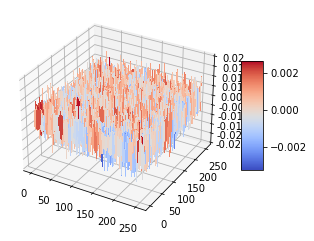

In [13]:
imx = 'Images'+os.sep+'RPyyy.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Заключение по экспериментам 1 и 2: При сжатии численное значение коэффициентов подобия PCE уменьшается, но пропорция сохраняется, изображения с более высоким коэффициентом подобия после сжатия также демонстрируют более высокий коэффициент подобия

Эксперимент 3: Аналогичные тесты на тех же изображениях, сжатых до размера 128х128

In [32]:
im1 = 'Images'+os.sep+'ReeP1.jpg'
im2 = 'Images'+os.sep+'ReeP2.jpg'
im3 = 'Images'+os.sep+'ReeP3.jpg'
Images = [im1, 
          im2, 
          im3]

RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

# To save RP in a '.mat' file:
#import scipy.io as sio
#sio.savemat('Fingerprint.mat', {'RP': RP, 'sigmaRP': sigmaRP, 'Fingerprint': Fingerprint})

PCE: -10.690897816020348
pvalue: 0.9994616802868669
PeakLocation: [0, 0]
peakheight: -0.027196223540189912
P_FA: 0.9994616802868669
log10P_FA: -0.0002338522301950117


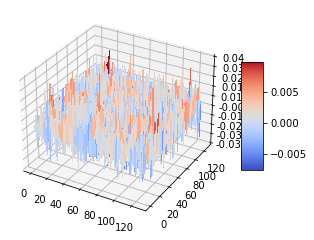

In [33]:
imx = 'Images'+os.sep+'ReePxxx.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

PCE: -0.6106436182144801
pvalue: 0.7827272103038128
PeakLocation: [0, 0]
peakheight: -0.006593654168489338
P_FA: 0.7827272103038128
log10P_FA: -0.10638956834008922


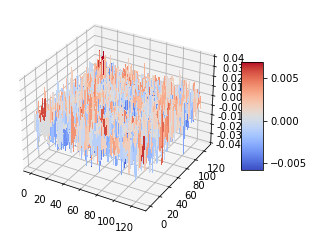

In [34]:
imx = 'Images'+os.sep+'ReePyyy.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

Заключение из эксперимента 3: Коэффициент подобия уходит в отрицательные значения, можно предположить, что главным показателем подобия является модуль PCE без учёта знака. Однако, другие коэффициенты начинают демонстрировать отклонения, поэтому для чистоты эксперимента в проекте решено использовать изображения разрешения 256х256. 